## Movie streaming datasets iflix

Segmenting audience in the new environment of video on demand entertainment

* [Kaggle](https://www.kaggle.com/aungpyaeap/movie-streaming-datasets-iflix?select=psychographics.csv)

Datasets:

* [Assets](#Assets.csv)
* [Demographics](#Demographics.csv)
* [Plays](#Plays.csv)
* [Psychographics](#Psychographics.csv)
* [Users](#Users.csv)

**"Iflix is a free and subscription video on demand service focused on emerging markets. Its global headquarters are in Kuala Lumpur, Malaysia."*

[Wikipedia](https://en.wikipedia.org/wiki/Iflix)

## Assets.csv

## Questions 

Do people watch more movies or series?

* [Show Type](#Show_Type)

What are the main genres?

* [Genre](#Genre)

Quanto tempo as pessoas passam assitindo?

* [Running Minutes](#Running_Minutes)

In what language people watch?

* [Language](#Source_Language)

How many different studios are there in the dataset?

* [Studios](#Studio_id)

In [1]:
# open libraries
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# open df
df_assets = pd.read_csv('C:/Users/camil/Desktop/dados/PI/assets.csv', encoding = 'latin1', engine = 'python', delimiter = ',')

In [3]:
# print 4 first rows 
df_assets.head()

,show_type,genre,running_minutes,source_language,asset_id,season_id,series_id,studio_id
0,Movies,Sci-Fi,146,English,1,NaN,NaN,325.0
1,TV,Documentary and Biography,43,English,2,4.0,5.0,7.0
2,TV,Reality,22,English,3,15.0,22.0,442.0
3,TV,Reality,22,English,4,15.0,22.0,442.0
4,TV,Reality,22,English,5,15.0,22.0,442.0


In [4]:
# print info about the dataset
df_assets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17271 entries, 0 to 17270
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   show_type        17271 non-null  object 
 1   genre            17270 non-null  object 
 2   running_minutes  17271 non-null  int64  
 3   source_language  17079 non-null  object 
 4   asset_id         17271 non-null  int64  
 5   season_id        13978 non-null  float64
 6   series_id        13978 non-null  float64
 7   studio_id        17269 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.1+ MB


#### Show_Type

Type of content, whether the asset is a movie or an episode of a TV series

17271 non-null

In [5]:
df_assets.show_type.value_counts()/len(df_assets)*100

TV        80.933356
Movies    19.066644
Name: show_type, dtype: float64

Text(0, 0.5, 'Type')

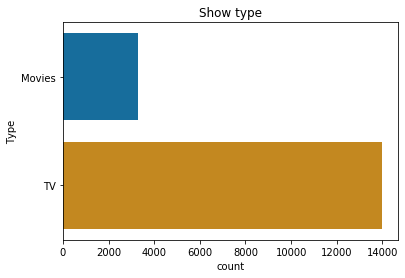

In [6]:
sns.countplot(y =df_assets.show_type, palette = 'colorblind')
plt.title('Show type')
plt.ylabel('Type')

Tv series are the most of the dataset, 80.94%. Movies are 19.07% of the dataset.

#### Genre

Genre of content

17270 non-null object

In [13]:
df_assets.genre.value_counts()/len(df_assets)*100

Drama                        43.541196
Kids                         13.265011
Comedy                        9.877830
Romance                       6.693301
Fantasy                       5.077876
Action and Adventure          4.377280
Anime                         2.466562
Reality                       2.333391
Documentary and Biography     2.107579
Horror                        1.887557
Sports                        1.366452
Lifestyle and Fashion         1.331712
Crime and Mystery             1.210121
Thriller                      1.053790
Music                         0.972729
Others                        0.509525
eSports                       0.399514
Sci-Fi                        0.347403
Family                        0.237392
Animation                     0.196862
News                          0.185282
Best of Web or Viral          0.127381
Education                     0.121591
Religion and Faith            0.098431
Game Show                     0.069481
Live Events and Specials 

Text(0, 0.5, '')

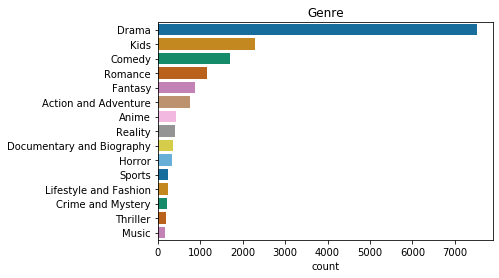

In [16]:
sns.countplot(y = df_assets.genre, order = df_assets.genre.value_counts().iloc[:15].index, palette = 'colorblind')
plt.title('Genre')
plt.ylabel('')

#### Running_Minutes

Runtime of content, (Playable number of minutes)

17271 non-null  int64

In [18]:
df_assets.running_minutes.describe()

count    17271.000000
mean        48.926177
std         30.719699
min          6.000000
25%         25.000000
50%         44.000000
75%         61.000000
max        249.000000
Name: running_minutes, dtype: float64

Text(0.5, 1.0, 'Running Time')

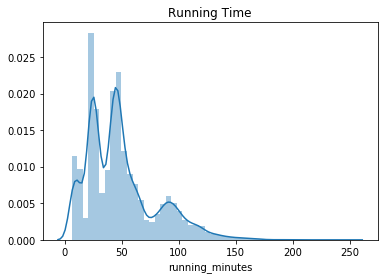

In [32]:
sns.distplot(df_assets.running_minutes, bins = 50)
plt.title('Running Time')

People watch 48.93 minutes on average. The maximum time is of 249 minutes.
In the graph above there're 3 peaks. 25 minutes, 50 minutes and 100 minutes.

#### Source_Language

Production language of content

17079 non-null object

In [37]:
df_assets.source_language.value_counts()/len(df_assets)*100

English               29.506109
Tagalog               16.652192
Indonesian            15.772104
Korean                11.690116
Chinese                5.929014
Malay                  5.338429
Japanese               2.593944
Thai                   2.431822
Arabic                 1.737016
Urdu                   1.563314
Burmese                1.094320
Bengali                0.602165
Hindi                  0.590585
Nepali                 0.561635
Spanish; Castilian     0.509525
Tamil                  0.416884
Central Khmer          0.266342
Vietnamese             0.266342
Sinhala; Sinhalese     0.214232
French                 0.208442
Turkish                0.156331
Swahili                0.138961
Avaric                 0.133171
Italian                0.110011
Afrikaans              0.092641
Kanuri                 0.092641
Dutch; Flemish         0.052110
Portuguese             0.028950
Swedish                0.017370
Hungarian              0.017370
Norwegian              0.017370
Danish  

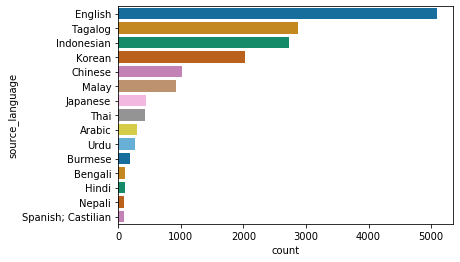

In [38]:
sns.countplot(y = df_assets.source_language, palette = 'colorblind', order = df_assets.source_language.value_counts().iloc[:15].index)

#### Asset_id

17271 non-null int64
 
 Unique identifier of video content, at the most granular level (a movie or an episode of a TV 
 
 There is no repeated video content.

In [40]:
df_assets.asset_id.value_counts()

2047     1
629      1
8849     1
10896    1
17037    1
        ..
15661    1
13612    1
3371     1
1322     1
2049     1
Name: asset_id, Length: 17271, dtype: int64

#### Season_id

13978  non-null float64

Unique identifier of content, at season level. Only applicable to TV series

In [44]:
df_assets.season_id.value_counts()

284.0     175
741.0     139
768.0     129
1193.0    125
339.0     118
         ... 
81.0        1
658.0       1
982.0       1
17.0        1
4.0         1
Name: season_id, Length: 1276, dtype: int64

#### Series_id 

13978 non-null  float64

Unique identifier of content, at series level. Only applicable to TV series

In [45]:
df_assets.series_id.value_counts()

804.0    189
235.0    175
620.0    166
234.0    161
896.0    160
        ... 
15.0       1
13.0       1
7.0        1
208.0      1
661.0      1
Name: series_id, Length: 1060, dtype: int64

#### Studio_id

studio_id 17269 non-null float64

There're 458 different studios in the dataset.

In [46]:
df_assets.studio_id.value_counts()

281.0    2355
170.0    1349
10.0     1330
450.0     890
271.0     448
         ... 
329.0       1
258.0       1
399.0       1
374.0       1
150.0       1
Name: studio_id, Length: 458, dtype: int64

In [53]:
# number of unique studios
df_assets.studio_id.nunique()

458

## Demographics.csv

## Questions 

What are the Platforms of consumption?
* [Platform](#Platform)

In [8]:
# open df
df_demographics = pd.read_csv('C:/Users/camil/Desktop/dados/PI/demographics.csv', encoding = 'latin1', engine = 'python', delimiter = ',')

In [56]:
# print the first 4 rows
df_demographics.head()

,user_id,platform,level_1,level_2,level_3,confidence_score
0,171798691973,android,Demographics,Income,Medium,1.0
1,326417514592,android,Demographics,Income,Medium,1.0
2,17179869245,android,Demographics,Income,Medium,1.0
3,996432412842,android,Demographics,Income,Low,1.0
4,1606317768894,android,Demographics,Income,Low,1.0


In [58]:
# print info about the dataset
df_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102745 entries, 0 to 102744
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           102745 non-null  int64  
 1   platform          102745 non-null  object 
 2   level_1           102745 non-null  object 
 3   level_2           102745 non-null  object 
 4   level_3           102745 non-null  object 
 5   confidence_score  102745 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.7+ MB


### User_id

In [63]:
# check if there are repeated users
df_demographics.user_id.value_counts() > 1

1391569403955     True
901943132244      True
1151051235460     True
1288490188834     True
1382979469426     True
                 ...  
1331439862128    False
386547056966     False
231928234319     False
549755814188     False
0                False
Name: user_id, Length: 72043, dtype: bool

In [34]:
df_filt = df_demographics[df_demographics.groupby('user_id')['user_id'].transform('size')>1]

In [106]:
df_demographics.shape

(102745, 6)

In [105]:
df_filt.shape

(49194, 6)

Investigar porque existem tantas linhas duplicadas.
Essas linhas dupicadas não fazem muito sentido, porque para um mesmo user_id existem dois niveis de renda diferentes.

In [36]:
df_filt.sort_values('user_id')

,user_id,platform,level_1,level_2,level_3,confidence_score
6437,2,android,Demographics,Income,Medium,1.000000
95214,2,android,Demographics,Income,Low,1.000000
2703,11,android,Demographics,Income,Low,1.000000
85243,11,android,Demographics,Income,Medium,1.000000
89653,27,web,Demographics,Income,Low,1.000000
...,...,...,...,...,...,...
90719,1709396984318,iOS,Demographics,Age,18 - 24,1.000000
55098,1709396984318,iOS,Demographics,Income,Medium,1.000000
83476,1709396984322,android,Demographics,Gender,Male,0.543187
44595,1709396984322,android,Demographics,Income,Low,1.000000


#### Platform

Platform of consumption

102745 non-null  object 

In [114]:
df_demographics.platform.value_counts()

android          86280
iOS              10109
web               4423
android-tv        1194
googlecast         358
Samsung Tizen      171
webOS               81
web-pwa             56
Roku                23
Vewd                16
Samsung Orsay       16
Panasonic           13
COTV                 5
Name: platform, dtype: int64

#### Level_1

Identifies the first level of the trait (psychologic or demographic)

102745 non-null  object 

In [119]:
df_demographics.level_1.value_counts()

Demographics    102745
Name: level_1, dtype: int64

All informations are demographics.

#### Level_2

102745 non-null  object

Identifies the second level of the trait

In [121]:
df_demographics.level_2.value_counts()

Income    70606
Gender    18071
Age       14068
Name: level_2, dtype: int64

There are three types of demographic traits.

#### Level_3

102745 non-null  object 

Identifies the third level of the trait, if available/relevant

In [122]:
df_demographics.level_3.value_counts()

Low        34180
Medium     26901
High        9525
Female      9218
Male        8853
25 - 34     7036
18 - 24     3676
< 18        1683
35 - 44     1335
45 - 54      237
55+          101
Name: level_3, dtype: int64

#### Confidence_score

102745 non-null  float64

Confidence in associating the said trait (level_1, level_2, level_3) with the user

In [125]:
df_demographics.confidence_score.describe()

count    102745.000000
mean          0.980793
std           0.078400
min           0.500000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: confidence_score, dtype: float64

In [31]:
df_demographics.sort_values('user_id')

,user_id,platform,level_1,level_2,level_3,confidence_score
2725,0,iOS,Demographics,Income,High,1.0
22810,1,android,Demographics,Income,Medium,1.0
95214,2,android,Demographics,Income,Low,1.0
6437,2,android,Demographics,Income,Medium,1.0
48246,3,android,Demographics,Income,Low,1.0
...,...,...,...,...,...,...
75990,1709396984327,android,Demographics,Income,Low,1.0
23051,1709396984328,android,Demographics,Income,Medium,1.0
36510,1709396984329,android,Demographics,Income,Medium,1.0
30516,1709396984331,android,Demographics,Income,Low,1.0


In [63]:
#df_demographics.reset_index().pivot(index = "user_id", columns = "level_2", values = "level_3")
df_reshape =df_demographics.pivot_table(index='user_id', 
                        columns='level_2', 
                        values='level_3',
                           aggfunc = 'first',
                        observed = 'True')

In [64]:
df_reshape.sort_values('user_id')

level_2,Age,Gender,Income
user_id,,,
0,NaN,NaN,High
1,NaN,NaN,Medium
2,NaN,NaN,Medium
3,NaN,NaN,Low
6,NaN,NaN,Medium
...,...,...,...
1709396984327,NaN,NaN,Low
1709396984328,NaN,NaN,Medium
1709396984329,NaN,NaN,Medium


In [9]:
df_demographics.melt(id_vars=['user_id', 'level_2'], value_vars=['level_3'])

,user_id,level_2,variable,value
0,171798691973,Income,level_3,Medium
1,326417514592,Income,level_3,Medium
2,17179869245,Income,level_3,Medium
3,996432412842,Income,level_3,Low
4,1606317768894,Income,level_3,Low
...,...,...,...,...
102740,34359738459,Age,level_3,25 - 34
102741,1520418423157,Age,level_3,18 - 24
102742,274877907051,Age,level_3,25 - 34
102743,1382979469397,Age,level_3,25 - 34


### Plays.csv

In [57]:
# open df
df_plays = pd.read_csv('C:/Users/camil/Desktop/dados/PI/plays.csv', engine = 'python', delimiter = ',')

In [40]:
# print the first 4 rows
df_plays.head()

,user_id,platform,asset_id,minutes_viewed
0,764504178919,android,13758,28
1,412316860611,android,13825,28
2,1503238553613,iOS,93,105
3,489626272003,android,6226,7
4,68719476744,android,3762,1


In [96]:
df_plays.sort_values('user_id')

,user_id,platform,asset_id,minutes_viewed,views,user_views
123656,1,android,5727,0,61,2
316045,1,android,12060,4,127,2
249083,2,android,9233,0,40,13
307298,2,android,6637,0,1361,13
101975,2,android,13778,53,159,13
...,...,...,...,...,...,...
194849,1709396984329,android,16915,21,2797,4
503988,1709396984330,android,15097,1,1090,1
269615,1709396984331,android,14936,108,7209,3
527580,1709396984331,android,17106,84,321,3


In [41]:
df_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542157 entries, 0 to 542156
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         542157 non-null  int64 
 1   platform        542157 non-null  object
 2   asset_id        542157 non-null  int64 
 3   minutes_viewed  542157 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 16.5+ MB


#### user_id         

User ID

542157 non-null  int64 

In [45]:
# check if there's repeated rows
df_plays.user_id.value_counts()

1511828488204    454
575525617696     425
429496729956     344
549755813946     339
498216206551     332
                ... 
1099511627907      1
1108101562499      1
850403524952       1
858993459544       1
511                1
Name: user_id, Length: 89602, dtype: int64

There are many user ids repeated, maybe because people watch more than once. So, with this column value_counts we can create a new feature that shows how many times someone has watched.

In [95]:
df_plays['user_views'] = df_plays.groupby('user_id')['user_id'].transform('size')

In [73]:
df_plays.user_views.describe()

count    542157.000000
mean         28.521463
std          40.005122
min           1.000000
25%           6.000000
50%          16.000000
75%          35.000000
max         454.000000
Name: views, dtype: float64

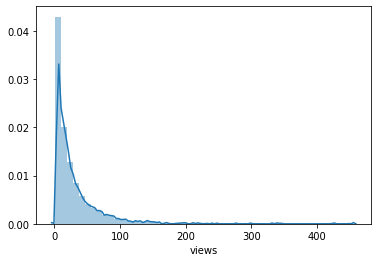

In [74]:
# plot an histogram
sns.distplot(df_plays.user_views)

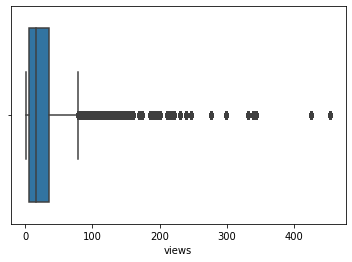

In [75]:
sns.boxplot(df_plays.views)

#### platform

Platform of consumption

542157 non-null  object

In [76]:
df_plays.platform.value_counts()

android          400266
android-tv        59678
iOS               33071
web               27591
web-embed         10812
Samsung Tizen      4029
webOS              2849
web-pwa             973
Samsung Orsay       769
Roku                744
Vewd                734
googlecast          409
Panasonic           184
Netrange             48
Name: platform, dtype: int64

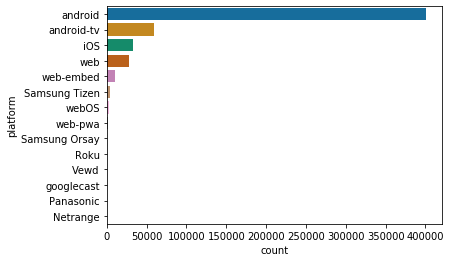

In [82]:
sns.countplot(y = df_plays.platform, palette = 'colorblind', order = df_plays.platform.value_counts().index)

#### asset_id

Asset ID

542157 non-null  int64

In [85]:
df_plays.asset_id.value_counts()

14129    7660
14936    7209
13799    5101
13672    4584
16077    4379
         ... 
105         1
10528       1
3877        1
10348       1
17242       1
Name: asset_id, Length: 17271, dtype: int64

In [86]:
df_plays['views'] = df_plays.groupby('asset_id')['asset_id'].transform('size')

In [89]:
df_plays.views.describe()

count    542157.000000
mean        822.687987
std        1455.867696
min           1.000000
25%          66.000000
50%         279.000000
75%         859.000000
max        7660.000000
Name: views, dtype: float64

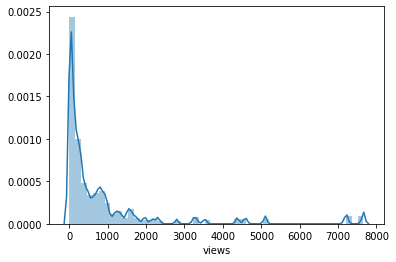

In [87]:
sns.distplot(df_plays.views)

#### minutes_viewed

Total number of minutes viewed, rounded to the nearest integer (0 means less than 30 seconds)

542157 non-null  int64 

In [91]:
df_plays.minutes_viewed.describe()

count    542157.000000
mean         34.057485
std          51.666177
min           0.000000
25%           1.000000
50%          16.000000
75%          59.000000
max       18078.000000
Name: minutes_viewed, dtype: float64

### Psychographics.csv

User psychographic and demographic tags analysis information.

In [105]:
df_psycho = pd.read_csv('C:/Users/camil/Desktop/dados/PI/psychographics.csv')

In [106]:
df_psycho.head()

,user_id,platform,level_1,level_2,level_3,confidence_score
0,352187318551,android,Psychographics,Social Media Fans,"\""\""",1.00
1,51539607784,android,Psychographics,Social Media Fans,"\""\""",1.00
2,1322849927469,android,Psychographics,Social Media Fans,"\""\""",1.00
3,137438953840,android,Psychographics,Movies Lovers,Romance Movies Fans,0.56
4,927712935974,android,Psychographics,Movies Lovers,Comedy Movies Fans,0.80


In [107]:
df_psycho.sort_values('user_id')

,user_id,platform,level_1,level_2,level_3,confidence_score
232013,0,iOS,Psychographics,Travellers,Local Commuters,0.29
459980,0,iOS,Psychographics,iflix Viewing Behaviour,casual,1.00
455792,1,android,Psychographics,Movies Lovers,Documentary and Biography Movies Fans,0.61
370778,1,android,Psychographics,Movies Lovers,English Movies Fans,0.24
300772,1,android,Psychographics,iflix Viewing Behaviour,casual,1.00
...,...,...,...,...,...,...
340584,1709396984331,android,Psychographics,Mobile Enthusiasts,High Data Users,0.68
438133,1709396984331,android,Psychographics,Movies Lovers,Indonesian Movies Fans,0.58
145889,1709396984331,android,Psychographics,TV Lovers,Korean TV Fans,0.60
314367,1709396984332,android,Psychographics,Mobile Enthusiasts,High Data Users,0.03


In [108]:
df_psycho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475089 entries, 0 to 475088
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           475089 non-null  int64  
 1   platform          475089 non-null  object 
 2   level_1           475089 non-null  object 
 3   level_2           475089 non-null  object 
 4   level_3           467342 non-null  object 
 5   confidence_score  475089 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 21.7+ MB


#### User_id

475089 non-null  int64

In [116]:
df_psycho.user_id.value_counts()

1374389534872    41
377957122486     37
344              34
1597727834671    32
798863917287     31
                 ..
1408749273191     1
1108101562789     1
1589137899941     1
137438954013      1
283467841653      1
Name: user_id, Length: 110639, dtype: int64

In [111]:
df_psycho.platform.value_counts()

android          354860
web               30381
android-tv        29242
iOS               26607
web-embed         25497
Samsung Tizen      3328
webOS              1877
web-pwa             827
googlecast          705
Vewd                609
Samsung Orsay       536
Roku                427
Panasonic           162
Netrange             20
COTV                 11
Name: platform, dtype: int64

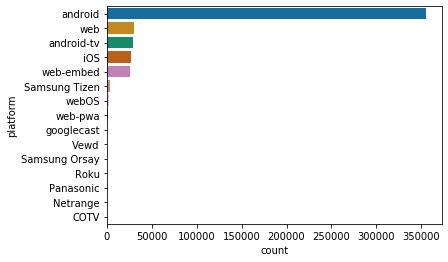

In [115]:
sns.countplot(y = df_psycho.platform, order = df_psycho.platform.value_counts().index, palette = 'colorblind')

In [118]:
df_psycho.columns

Index(['user_id', 'platform', 'level_1', 'level_2', 'level_3',
       'confidence_score'],
      dtype='object')

In [119]:
df_psycho.level_1.value_counts()

Psychographics    475089
Name: level_1, dtype: int64

In [121]:
df_psycho.level_2.value_counts()

Movies Lovers                  206494
TV Lovers                       90932
Mobile Enthusiasts              62860
Travellers                      55821
iflix Viewing Behaviour         44988
Social Media Fans                6247
Sports Fans                      3972
Music Lovers                     2159
News Junkies & Avid Readers      1616
Name: level_2, dtype: int64

In [122]:
df_psycho.level_3.value_counts()

High Data Users           56516
Local Commuters           52254
Indonesian Movies Fans    32507
casual                    29555
Comedy Movies Fans        26928
                          ...  
Dutch; Flemish TV Fans        2
Russian Movies Fans           1
Norwegian TV Fans             1
Akan Movies Fans              1
Kazakh Movies Fans            1
Name: level_3, Length: 121, dtype: int64

### Users.csv

Users list.

In [125]:
df_users = pd.read_csv('C:/Users/camil/Desktop/dados/PI/users.csv')

In [126]:
df_users.head()

,user_id,country_code
0,781684047872,ID
1,781684047873,MY
2,781684047874,ID
3,781684047875,ID
4,781684047876,ID


In [127]:
df_users.user_id.value_counts()

463856467982     1
738734375081     1
798863917225     1
790273982633     1
816043786409     1
                ..
1382979469451    1
489626271983     1
515396075866     1
94489280949      1
0                1
Name: user_id, Length: 110639, dtype: int64

In [128]:
df_users.country_code.value_counts()

ID    55240
PH    19752
MY    16798
NP     8332
BD     3117
TH     2266
PK     1438
VN      942
MM      581
KH      535
LK      306
SA      208
ZW      182
MA      151
KE      123
EG      117
IQ      111
NG       90
GH       78
BN       47
TZ       33
SD       32
JO       26
UG       23
KW       22
LB       21
ZM       14
MU       13
MV       12
BH       10
SG        5
LA        3
JP        2
US        2
IN        2
KR        1
ET        1
TN        1
GB        1
QA        1
Name: country_code, dtype: int64

### Countries geo code

[Google](https://developers.google.com/public-data/docs/canonical/countries_csv)

In [179]:
df_geo = pd.read_csv('C:/Users/camil/Desktop/dados/PI/geo_code.csv',thousands='.')

In [180]:
df_geo.head()

,country,latitude,longitude,name
0,AD,42546245.0,1601554.0,Andorra
1,AE,23424076.0,53847818.0,United Arab Emirates
2,AF,3393911.0,67709953.0,Afghanistan
3,AG,17060816.0,-61796428.0,Antigua and Barbuda
4,AI,18220554.0,-63068615.0,Anguilla


In [181]:
df_users.columns = ['user_id', 'country']

In [182]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110639 entries, 0 to 110638
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  110639 non-null  int64 
 1   country  110639 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [183]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    244 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
 3   name       245 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [184]:
#df_users.join(df_geo, on = 'country')
df_countries = df_users.merge(df_geo, on='country', how='left')

In [178]:
#df_netflix['duration'] = df_netflix.duration.str.rstrip('min').astype(float)
df_countries.latitude = df_countries['latitude'].str.replace('\.','').astype(float)
#df_countries.latitude =pd.to_numeric(df_countries['latitude'])
#df_countries.longitude =pd.to_numeric(df_countries['longitude'])

AttributeError: Can only use .str accessor with string values!

In [185]:
df_countries.head()

,user_id,country,latitude,longitude,name
0,781684047872,ID,-789275.0,113921327.0,Indonesia
1,781684047873,MY,4210484.0,101975766.0,Malaysia
2,781684047874,ID,-789275.0,113921327.0,Indonesia
3,781684047875,ID,-789275.0,113921327.0,Indonesia
4,781684047876,ID,-789275.0,113921327.0,Indonesia


In [187]:
import folium.plugins as plugins
from folium.plugins import HeatMap
import webbrowser

df_copy = df_countries.copy()
df_copy['count'] = 1

default_location=[-789275, 113921327]

map = folium.Map(location=default_location, control_scale=True, zoom_start=12)

map.add_child(plugins.HeatMap(data=df_copy[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude', 'count']).sum().reset_index().values.tolist(),\
        radius=8, max_zoom=13).add_to(map))

#map.add_child(folium.ClickForMarker(popup='Potential Location'))

map.save('map_webbrowser.html')
webbrowser.open('map_webbrowser.html')
display(map)